## Managed Inference

[Go to Api Tokens page (Log in if necessary)](https://console.deci.ai/settings/api-tokens). Copy `Temporary Access Token` (valid for 9 hours):

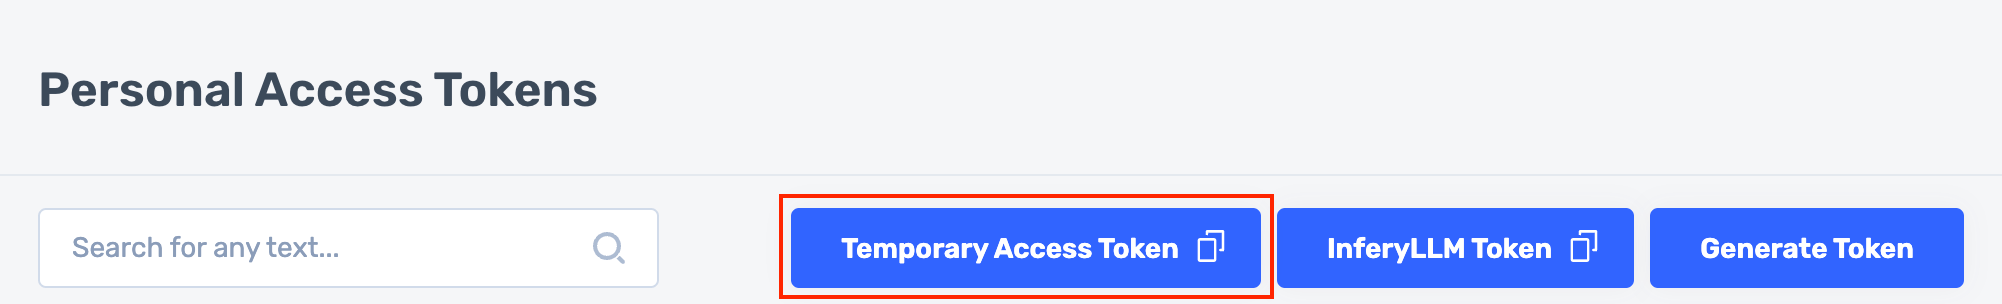

In [ ]:
%set_env ACCESS_TOKEN=... # No Quotes!

[Go to Workspace page](https://console.development.deci.ai/settings/workspace). Copy `Workspace Id`:
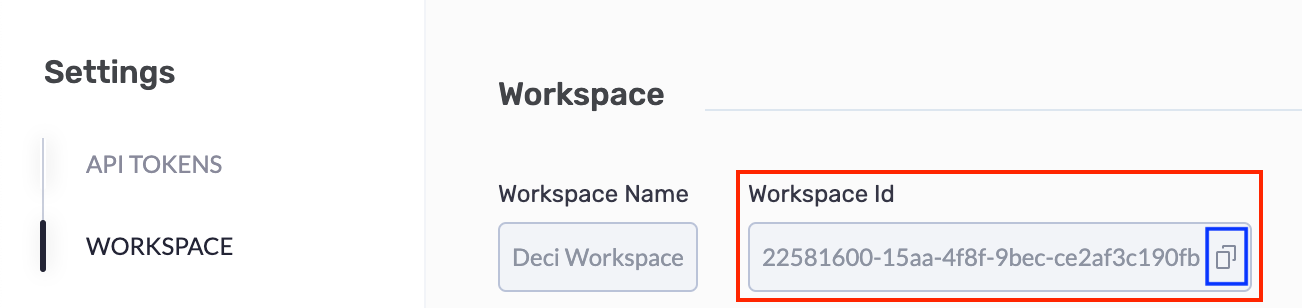

In [ ]:
%set_env WORKSPACE_ID=... # No Quotes!

In [ ]:
%%bash
export MODEL_NAME="deci-lm-7b-instruct"
curl "https://api.deci.ai/serving/llm/$MODEL_NAME/generate" \
    -H "Authorization: Bearer $ACCESS_TOKEN" \
    -H "x-deci-workspace: $WORKSPACE_ID" \
    -H "Content-type: application/json" \
    -d '{
        "prompts": [
            "Write a short story about a dragon who was hungry:",
            "Recipe for meatless lasagne:"
        ],
        "generation_params": { "max_new_tokens": 500, "top_p": 0.95, "top_k": 50, "temperature": 0.1 },
        "stream": true
    }'